In [11]:
#!pip install dnspython

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymongo
import datetime
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
PASSWORD = '#######'

In [3]:
CRYPTO_LIST = { 'bitcoin': 'BTC-USD', 'dash' : 'DASH-USD', 'ethereum' : 'ETH-USD', 'litecoin' : 'LTC-USD', 'monero' : 'XMR-USD',
                'ripple' : 'XRP-USD' }

FOREX_LIST = { 'AustralianDollar' : 'AUDUSD=X', 'Euro' : 'EURUSD=X', 'NewZealandDollar' : 'NZDUSD=X', 'BritishPound' : 'GBPUSD=X', 
              'BrazilianReal' : 'BRLUSD=X', 'CanadianDollar' : 'CADUSD=X', 'ChineseYuan' : 'CNYUSD=X', 'HongKongDollar' : 'HKDUSD=X', 
              'IndianRupee' : 'INRUSD=X', 'KoreanWon' : 'KRWUSD=X', 'MexicanPeso' : 'MXNUSD=X', 'SouthAfricanRand' : 'ZARUSD=X', 
              'SingaporeDollar' : 'SGDUSD=X', 'DanishKrone' : 'DKKUSD=X', 'JapaneseYen' : 'JPYUSD=X', 'MalaysianRinggit' : 'MYRUSD=X', 
              'NorwegianKrone' : 'NOKUSD=X', 'SwedishKrona' : 'SEKUSD=X', 'SriLankanRupee' : 'LKRUSD=X', 'SwissFranc' : 'CHFUSD=X', 
              'NewTaiwanDollar' : 'TWDUSD=X', 'ThaiBaht' : 'THBUSD=X' }

STOCK_INDICES = { 'S&P500' : '^GSPC', 'Dow30' : '^DJI', 'NASDAQ' : '^IXIC', 'Russel2000' : '^RUT', 'S&P/TSX' : '^GSPTSE', 
                  'IBOVESPA' : '^BVSP', 'IPCMEXICO' : '^MXX', 'Nikkei225' : '^N225', 'HANGSENGINDEX' : '^HSI', 
                  'SSE' : '000001.SS', 'ShenzhenComponent' : '399001.SZ', 'TSEC' : '^TWII', 'KOSPI' : '^KS11', 'STI' : '^STI', 
                  'Jakarta' : '^JKSE', 'FTSEBursaMalaysiaKLCI' : '^KLSE', 'S&P/ASX200' : '^AXJO',  'S&P/NZX50' : '^NZ50', 
                  'S&PBSE' : '^BSESN', 'FTSE100' : '^FTSE', 'DAX' : '^GDAXI', 'CAC40' : '^FCHI', 
                  'ESTX50' : '^STOXX50E', 'EURONEXT100' : '^N100', 'BEL 20' : '^BFX' }

In [4]:
nn_data_columns = ['bitcoin', 'dash', 'ethereum', 'litecoin', 'monero', 'ripple', 'AustralianDollar', 'Euro', 'NewZealandDollar', 
                   'BritishPound', 'BrazilianReal', 'CanadianDollar', 'ChineseYuan', 'HongKongDollar', 'IndianRupee', 'KoreanWon', 
                   'MexicanPeso', 'SouthAfricanRand', 'SingaporeDollar', 'DanishKrone', 'JapaneseYen', 'MalaysianRinggit', 
                   'NorwegianKrone', 'SwedishKrona', 'SriLankanRupee', 'SwissFranc', 'NewTaiwanDollar', 'ThaiBaht', 'S&P500', 
                   'Dow30', 'NASDAQ', 'Russel2000', 'S&P/TSX', 'IBOVESPA', 'IPCMEXICO', 'Nikkei225', 'HANGSENGINDEX', 
                   'SSE', 'ShenzhenComponent', 'TSEC', 'KOSPI', 'STI', 'Jakarta', 'FTSEBursaMalaysiaKLCI', 'S&P/ASX200', 'S&P/NZX50', 
                   'S&PBSE', 'FTSE100', 'DAX', 'CAC40', 'ESTX50', 'EURONEXT100', 'BEL 20']

In [5]:
def get_nn_data():
  client = pymongo.MongoClient("mongodb+srv://kmhatre:" + PASSWORD + "@crypto.j5hw0.mongodb.net/" + 'nn_data' + "?retryWrites=true&w=majority")
  db = client['nn_data']
  col = db['nn_data']
  result = []
  for x in col.find():
    result.append(x)
  df = pd.DataFrame(result)
  df = df.drop(['_id'], axis=1)  	
  return df

In [6]:
df = get_nn_data()
df.head()

,bitcoin,dash,ethereum,litecoin,monero,ripple,AustralianDollar,Euro,NewZealandDollar,BritishPound,BrazilianReal,CanadianDollar,ChineseYuan,HongKongDollar,IndianRupee,KoreanWon,MexicanPeso,SouthAfricanRand,SingaporeDollar,DanishKrone,JapaneseYen,MalaysianRinggit,NorwegianKrone,SwedishKrona,SriLankanRupee,SwissFranc,NewTaiwanDollar,ThaiBaht,S&P500,Dow30,NASDAQ,Russel2000,S&P/TSX,IBOVESPA,IPCMEXICO,Nikkei225,HANGSENGINDEX,SSE,ShenzhenComponent,TSEC,KOSPI,STI,Jakarta,FTSEBursaMalaysiaKLCI,S&P/ASX200,S&P/NZX50,S&PBSE,TA-125,FTSE100,DAX,CAC40,ESTX50,EURONEXT100,BEL 20
0,247.05,2.38842,0.634963,3.14504,0.380724,0.0051822,0.7267442,1.1286936,0.6668,1.5351316,0.26441735,0.76931953,0.15764168,0.12904108,0.015385798,0.0008688852,0.060942907,0.07519249,0.71250445,0.15123788,0.008338267,0.2422774,0.12282869,0.121345535,0.0072695552,1.0349824,0.030452523,0.027941545,2014.89,17084.49,4830.47,1165.36,13964.4,49338.0,44375.62,18438.67,22458.8,3183.152,10540.19,8445.96,2019.53,2998.5,4589.344,1706.54,5279.7,5638.79,27079.51,1326.9,6416.2,10096.6,4701.39,3250.31,904.62,3442.77
1,238.73,2.17149,0.687171,3.03008,0.409928,0.00551664,0.7036802,1.1193445,0.64,1.5139129,0.250075,0.754962,0.1575771,0.12904093,0.015239722,0.0008495455,0.059718248,0.07184269,0.69905627,0.15005079,0.008346549,0.22818026,0.11856531,0.11942437,0.0072469017,1.0243802,0.030240715,0.027449152,1951.36,16472.37,4707.78,1114.12,13339.7,47033.0,42735.15,17725.13,21506.09,3052.781,9988.25,8305.03,1969.68,2793.15,4207.799,1628.8,5052.0,5593.51,26220.95,1305.82,6130.0,9553.07,4458.88,3088.18,859.8,3342.93
2,326.149,2.21098,0.955532,3.13361,0.407052,0.00422245,0.71179444,1.0669967,0.649182,1.5239257,0.26545617,0.7519362,0.15686521,0.12902877,0.015134318,0.0008587672,0.060131203,0.070612,0.7040766,0.14303288,0.008095527,0.23378141,0.11548731,0.11471981,0.00719528,0.98145056,0.030302113,0.027831895,2081.24,17732.75,5073.64,1166.73,13473.8,48139.0,44620.6,19859.81,22500.22,3617.062,12609.84,8477.2,1988.91,2919.83,4518.94,1660.06,5256.1,6008.52,25841.92,1361.27,6329.9,11085.44,4915.1,3448.93,952.68,3701.84
3,251.989,2.31512,0.522968,3.14418,0.384266,0.00541833,0.7222824,1.1384983,0.6648936,1.525809,0.25714874,0.76816714,0.1579205,0.12904093,0.015364524,0.00087102706,0.060855385,0.0738918,0.7138014,0.15259022,0.008352824,0.24166264,0.12280939,0.12293636,0.007275373,1.0435146,0.030552076,0.028078055,2003.69,17081.89,4796.61,1147.84,13844.7,47363.0,44318.19,18234.74,22600.46,3293.23,11042.13,8567.92,2019.05,2984.88,4483.076,1711.14,5197.3,5727.13,26846.53,1311.21,6342.3,10032.82,4643.38,3221.28,895.57,3396.55
4,304.618,2.14183,1.00248,3.10077,0.448829,0.00467519,0.7192692,1.103704,0.6772773,1.5312998,0.2575063,0.7535795,0.15764913,0.12904009,0.015368774,0.00088181865,0.0601041,0.073045485,0.71624,0.14790711,0.00830034,0.23427434,0.11815499,0.11759448,0.007246377,1.0131712,0.030610995,0.028180921,2090.35,17779.52,5095.69,1178.72,13863.2,46741.0,44741.68,18903.02,22956.57,3375.196,11494.35,8665.99,2042.51,3040.51,4608.74,1686.51,5266.9,6002.97,27039.76,1360.34,6437.8,10831.96,4890.58,3421.09,940.81,3579.36


In [7]:
x_scaler = StandardScaler()
x = x_scaler.fit_transform(df[ list(STOCK_INDICES.keys()) + list(FOREX_LIST.keys()) ].to_numpy(dtype=np.float32))[1:]
y_scaler = StandardScaler()
y = y_scaler.fit_transform(df[ list(CRYPTO_LIST.keys()) ].to_numpy(dtype=np.float32))[:-1]

In [8]:
x.shape, y.shape

((1891, 47), (1891, 6))

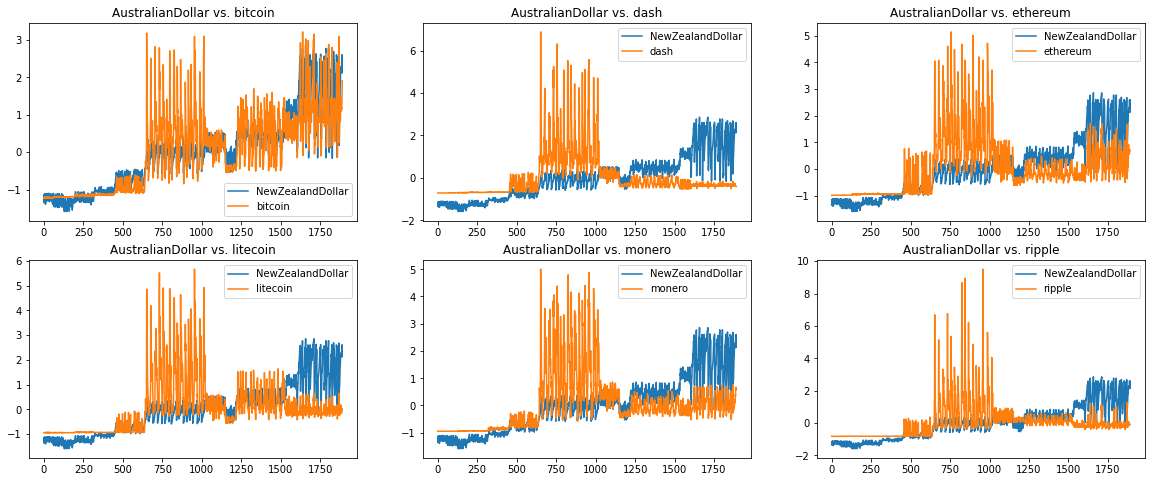

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))
k = 0
l = 2
for i in range(2):
  for j in range(3):
    ax[i, j].plot(x[:, l], label=list(FOREX_LIST.keys())[l] )
    ax[i, j].plot(y[:, k], label=list(CRYPTO_LIST.keys())[k])
    ax[i, j].set_title(list(FOREX_LIST.keys())[0] + ' vs. ' + list(CRYPTO_LIST.keys())[k])
    ax[i, j].legend()
    k += 1

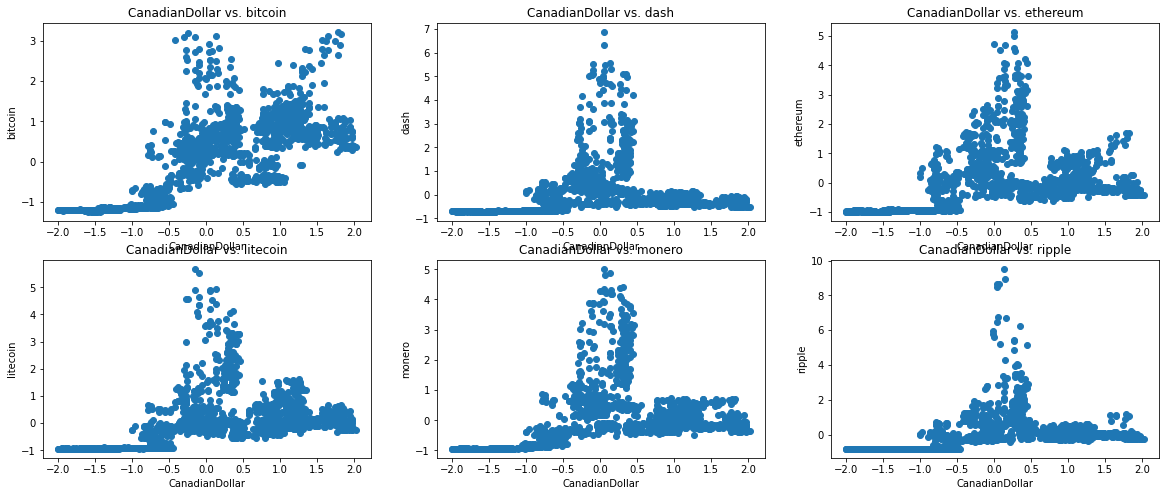

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(20, 8))
k = 0
l = 5
for i in range(2):
  for j in range(3):
    ax[i, j].scatter(x[:, l], y[:, k] )
    ax[i, j].set_xlabel(nn_data_columns[6+l])
    ax[i, j].set_ylabel(list(CRYPTO_LIST.keys())[k])
    ax[i, j].set_title( nn_data_columns[6+l] + ' vs. ' + list(CRYPTO_LIST.keys())[k])
    k += 1

In [62]:
df[['bitcoin']].corrwith(df[['Euro']])

Series([], dtype: float64)

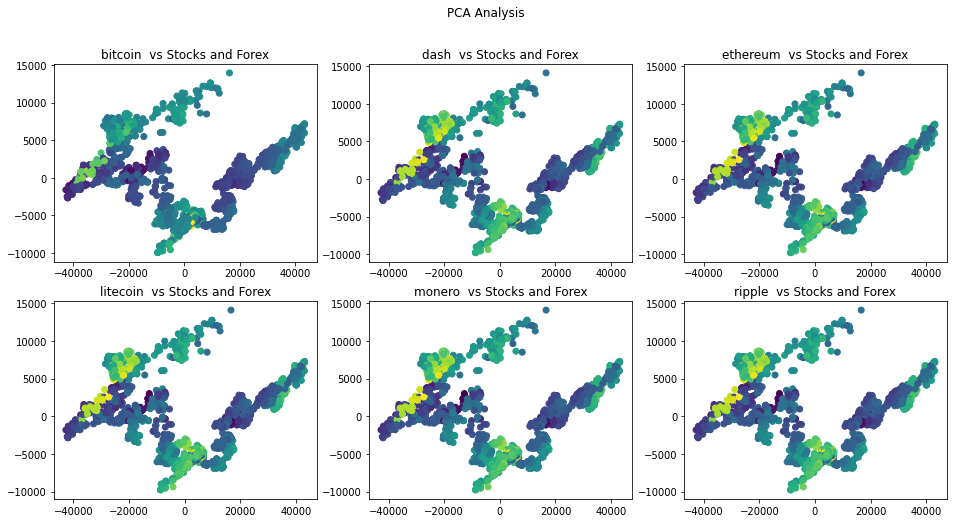

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
k = 0
for i in range(2):
  for j in range(3):
    pca = PCA(n_components=3)
    DF = df[[list(CRYPTO_LIST.keys())[k]] + list(STOCK_INDICES.keys()) + list(FOREX_LIST.keys())]
    x1 = pca.fit_transform(DF.to_numpy(dtype=np.float32))
    ax[i, j].set_title(str(list(CRYPTO_LIST.keys())[k]) + '  vs Stocks and Forex')
    ax[i, j].scatter(x1[:, 0], x1[:, 1], c=x1[:, 2])
    k += 1
plt.suptitle('PCA Analysis')
plt.show()

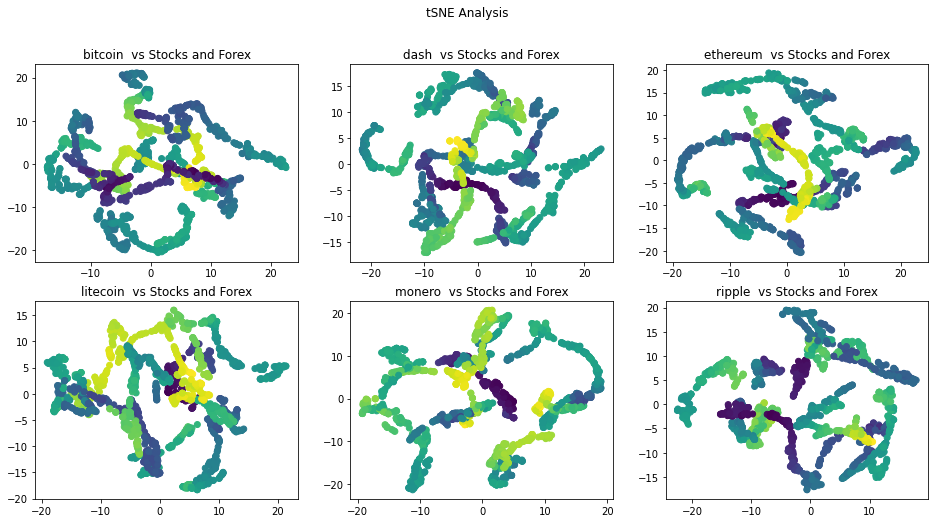

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
k = 0
for i in range(2):
  for j in range(3):
    tsne = TSNE(n_components=3)
    DF = df[[list(CRYPTO_LIST.keys())[k]] + list(STOCK_INDICES.keys()) + list(FOREX_LIST.keys())]
    x1 = tsne.fit_transform(DF.to_numpy(dtype=np.float32))
    ax[i, j].set_title(str(list(CRYPTO_LIST.keys())[k]) + '  vs Stocks and Forex')
    ax[i, j].scatter(x1[:, 0], x1[:, 1], c=x1[:, 2])
    k += 1
plt.suptitle('tSNE Analysis')
plt.show()